### conceito

Uma árvore de decisão começa com o **root node**, que é onde ocorrerá a primeira divisão. Abaixo do root node estão os **internal nodes**, que são resultados das divisões anteriores e dão resultado a novas divisões. No fim da árvore estão os **leaf nodes**, onde são decididos a qual label o dado que passa pela árvore pertencerá. Quando um leaf node não possui 100% dos exemplos em apenas uma categoria, estes são chamados de impuros. Para determinar qual separação é melhor em cada ponto da árvore utilizam-se métodos para mensurar e comparar a impuridade das divisões:

**Gini** é uma medida usada para calcular desigualdade: 1 - $ (probclasse 1)^2 $ - $ (probclasse 2)^2 $

**Entropia**

In [1]:
from sklearn import datasets

# importar dataset
iris = datasets.load_iris()

# divisão entre variáveis explicativas e target
X = iris.data[:, [2, 3]]
y = iris.target

In [2]:
from sklearn.tree import DecisionTreeClassifier

# rodar algoritmo
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

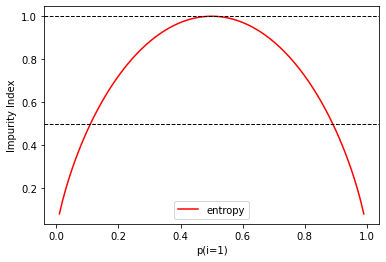

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# cálculo da entropia:

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

x = np.arange(0.0, 1.0, 0.01)

e = [entropy(p) if p != 0 else None for p in x]

# gráico da impureza:

plt.plot(x, e, label='entropy', color='r') 

for y in [0.5, 1.0]:
    plt.axhline(y=y, linewidth=1, color='k', linestyle='--')

plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.legend()
plt.show()

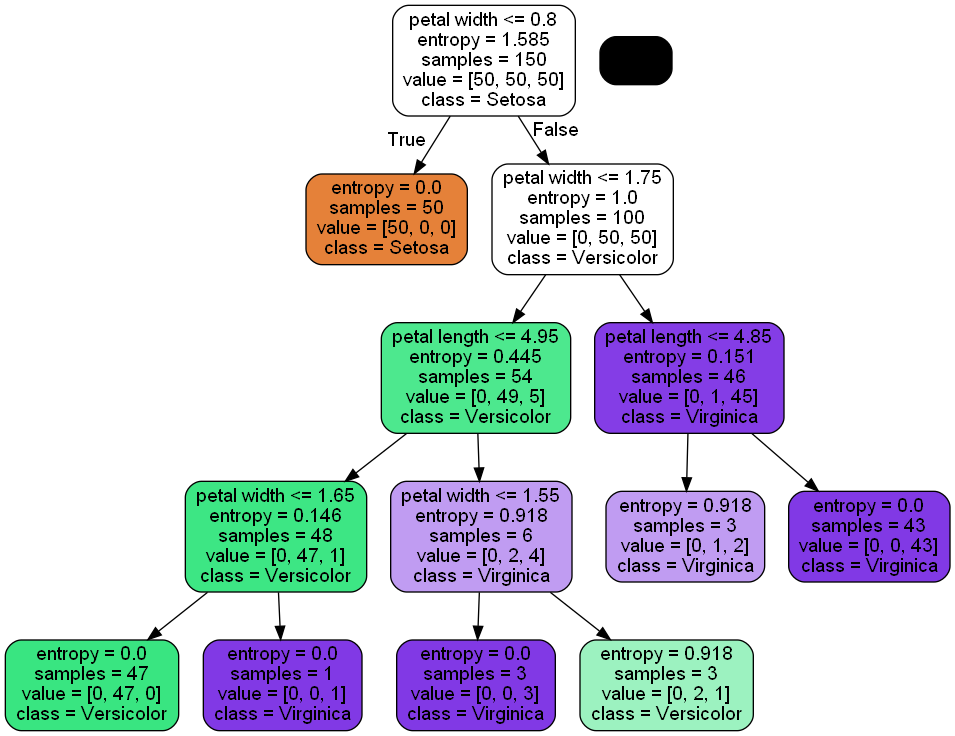

In [4]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor','Virginica'], 
                           feature_names=['petal length', 'petal width'], out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')  

from IPython.display import Image
Image("./tree.png")